**PYWINTER 2D temperature**

Example with 2-meter temperature hourly data from MERRA2 model Analisys

In [12]:
#from pywinter import winter
import numpy as np
from datetime import datetime
from netCDF4 import Dataset,num2date

In [15]:
pathfile = 'MERRA2_400.tavg1_2d_slv_Nx.20150105.SUB.nc'
path_save = '/PWINTER/path_save/'

In [16]:
netfile = Dataset(pathfile,'r')
temp2m = netfile.variables['T2M'][:,:,:] # [time,lat,lon]
lat = netfile.variables['lat'][:]
lon = netfile.variables['lon'][:]

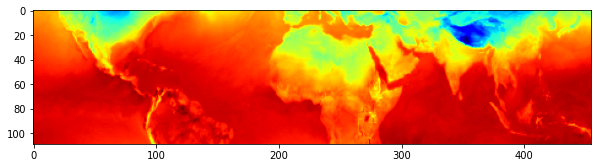

In [35]:
# quick data view 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(np.flipud(temp2m[0,:,:]),cmap='jet')

In [36]:
time = netfile.variables['time']
timed1 = num2date(time[:],units=time.units,calendar=time.calendar)
timed2 = [str(i)[:13].replace(' ','_') for i in timed1]

In [38]:
print(timed2)

['2015-01-05_00', '2015-01-05_01', '2015-01-05_02', '2015-01-05_03', '2015-01-05_04', '2015-01-05_05', '2015-01-05_06', '2015-01-05_07', '2015-01-05_08', '2015-01-05_09', '2015-01-05_10', '2015-01-05_11', '2015-01-05_12', '2015-01-05_13', '2015-01-05_14', '2015-01-05_15', '2015-01-05_16', '2015-01-05_17', '2015-01-05_18', '2015-01-05_19', '2015-01-05_20', '2015-01-05_21', '2015-01-05_22', '2015-01-05_23']


In [39]:
geo = winter.Geo0(lat,lon)

In [ ]:

for i in range(len(timed)):
  winter_t2 = winter.V2d('TT',temp2m[i,:,:])
  total_var = [winter_t2]
  winter.cinter('FILETEMP',timed2[i],geo,total_var,path_save)